In [167]:
import pandas as pd
import numpy as np
import itertools

In [168]:
pd.set_option('display.max_columns', None)

In [198]:
df = pd.read_csv('data/deadlock_matches_19k.csv')
df

,matchid,winner,hero_1_A,hero_2_A,hero_3_A,hero_4_A,hero_5_A,hero_6_A,hero_1_B,hero_2_B,hero_3_B,hero_4_B,hero_5_B,hero_6_B
0,6300004,The Amber Hand,Haze,McGinnis,Lash,Bebop,Wraith,Lady Geist,Seven,Vindicta,Grey Talon,Infernus,Pocket,Warden
1,6300005,The Sapphire Flame,Yamato,Kelvin,Vindicta,Infernus,Shiv,Bebop,Seven,Wraith,Pocket,Mo & Krill,Abrams,Paradox
2,6300007,The Amber Hand,Lady Geist,Kelvin,Infernus,Pocket,Warden,Haze,Paradox,Ivy,Seven,Viscous,Abrams,Shiv
3,6300008,The Sapphire Flame,Warden,Abrams,Dynamo,Haze,Viscous,Shiv,Bebop,McGinnis,Grey Talon,Vindicta,Wraith,Seven
4,6300009,The Sapphire Flame,Ivy,Kelvin,Grey Talon,Mo & Krill,Pocket,Wraith,Viscous,Shiv,Vindicta,Haze,Seven,Infernus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19397,6203110,The Amber Hand,Vindicta,Bebop,Infernus,Seven,Lady Geist,McGinnis,Lash,Yamato,Wraith,Abrams,Dynamo,Kelvin
19398,6203112,The Amber Hand,Lady Geist,Bebop,Pocket,Haze,Seven,Paradox,Viscous,Lash,Grey Talon,Infernus,Wraith,Dynamo
19399,6203113,The Amber Hand,Grey Talon,Abrams,Paradox,Ivy,Shiv,Infernus,Viscous,Yamato,Vindicta,McGinnis,Haze,Seven
19400,6203117,The Sapphire Flame,Bebop,Yamato,Pocket,McGinnis,Vindicta,Haze,Shiv,Infernus,Seven,Warden,Wraith,Grey Talon


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19402 entries, 0 to 19401
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   matchid   19402 non-null  int64 
 1   winner    19402 non-null  object
 2   hero_1_A  19402 non-null  object
 3   hero_2_A  19402 non-null  object
 4   hero_3_A  19402 non-null  object
 5   hero_4_A  19402 non-null  object
 6   hero_5_A  19402 non-null  object
 7   hero_6_A  19402 non-null  object
 8   hero_1_B  19402 non-null  object
 9   hero_2_B  19402 non-null  object
 10  hero_3_B  19402 non-null  object
 11  hero_4_B  19402 non-null  object
 12  hero_5_B  19402 non-null  object
 13  hero_6_B  19402 non-null  object
dtypes: int64(1), object(13)
memory usage: 2.1+ MB


In [200]:
df.duplicated().sum()

0

In [201]:
df['winner'] = df['winner'].apply(lambda x: 0 if x == 'The Amber Hand' else 1)
for ch in ('A', 'B'):
    for i in range(1, 7):
        df[f'hero_{i}_{ch}'] = df[f'hero_{i}_{ch}'].str.lower()
df

,matchid,winner,hero_1_A,hero_2_A,hero_3_A,hero_4_A,hero_5_A,hero_6_A,hero_1_B,hero_2_B,hero_3_B,hero_4_B,hero_5_B,hero_6_B
0,6300004,0,haze,mcginnis,lash,bebop,wraith,lady geist,seven,vindicta,grey talon,infernus,pocket,warden
1,6300005,1,yamato,kelvin,vindicta,infernus,shiv,bebop,seven,wraith,pocket,mo & krill,abrams,paradox
2,6300007,0,lady geist,kelvin,infernus,pocket,warden,haze,paradox,ivy,seven,viscous,abrams,shiv
3,6300008,1,warden,abrams,dynamo,haze,viscous,shiv,bebop,mcginnis,grey talon,vindicta,wraith,seven
4,6300009,1,ivy,kelvin,grey talon,mo & krill,pocket,wraith,viscous,shiv,vindicta,haze,seven,infernus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19397,6203110,0,vindicta,bebop,infernus,seven,lady geist,mcginnis,lash,yamato,wraith,abrams,dynamo,kelvin
19398,6203112,0,lady geist,bebop,pocket,haze,seven,paradox,viscous,lash,grey talon,infernus,wraith,dynamo
19399,6203113,0,grey talon,abrams,paradox,ivy,shiv,infernus,viscous,yamato,vindicta,mcginnis,haze,seven
19400,6203117,1,bebop,yamato,pocket,mcginnis,vindicta,haze,shiv,infernus,seven,warden,wraith,grey talon


In [202]:
heroes = pd.read_csv('data/heroes_stats.csv')['localized_name']
duo_winrate = {}
for i in itertools.combinations(heroes, 2):
    duo_winrate[i] = {'win': 0, 'total': 0}

In [203]:
A_team = ['hero_1_A', 'hero_2_A', 'hero_3_A', 'hero_4_A', 'hero_5_A', 'hero_6_A']
B_team = ['hero_1_B', 'hero_2_B', 'hero_3_B', 'hero_4_B', 'hero_5_B', 'hero_6_B']

df['A'] = df[A_team].values.tolist()
df['B'] = df[B_team].values.tolist()

for ch in ('A', 'B'):
    for i in range(1, 7):
        df.drop(f'hero_{i}_{ch}', axis=1, inplace=True)
df

,matchid,winner,A,B
0,6300004,0,"[haze, mcginnis, lash, bebop, wraith, lady geist]","[seven, vindicta, grey talon, infernus, pocket..."
1,6300005,1,"[yamato, kelvin, vindicta, infernus, shiv, bebop]","[seven, wraith, pocket, mo & krill, abrams, pa..."
2,6300007,0,"[lady geist, kelvin, infernus, pocket, warden,...","[paradox, ivy, seven, viscous, abrams, shiv]"
3,6300008,1,"[warden, abrams, dynamo, haze, viscous, shiv]","[bebop, mcginnis, grey talon, vindicta, wraith..."
4,6300009,1,"[ivy, kelvin, grey talon, mo & krill, pocket, ...","[viscous, shiv, vindicta, haze, seven, infernus]"
...,...,...,...,...
19397,6203110,0,"[vindicta, bebop, infernus, seven, lady geist,...","[lash, yamato, wraith, abrams, dynamo, kelvin]"
19398,6203112,0,"[lady geist, bebop, pocket, haze, seven, paradox]","[viscous, lash, grey talon, infernus, wraith, ..."
19399,6203113,0,"[grey talon, abrams, paradox, ivy, shiv, infer...","[viscous, yamato, vindicta, mcginnis, haze, se..."
19400,6203117,1,"[bebop, yamato, pocket, mcginnis, vindicta, haze]","[shiv, infernus, seven, warden, wraith, grey t..."


In [204]:
A_win = df[df['winner'] == 0]
B_win = df[df['winner'] == 1]

for i in duo_winrate:
    count = 0
    for j in A_win['A']:
        if (i[0] in j and i[1] in j):
            count += 1
    duo_winrate[i]['win'] += count
    duo_winrate[i]['total'] += count

    count = 0
    for j in A_win['B']:
        if (i[0] in j and i[1] in j):
            count += 1
    duo_winrate[i]['total'] += count

for i in duo_winrate:
    count = 0
    for j in B_win['A']:
        if (i[0] in j and i[1] in j):
            count += 1
    duo_winrate[i]['total'] += count

    count = 0
    for j in B_win['B']:
        if (i[0] in j and i[1] in j):
            count += 1
    duo_winrate[i]['win'] += count
    duo_winrate[i]['total'] += count

In [205]:
# save duo_winrate in txt file
# open('data/duo_winrate.txt', 'w').write(str(duo_winrate))

In [206]:
duo_winrate_df = pd.DataFrame.from_dict(duo_winrate).T
duo_winrate_df['winrate'] = duo_winrate_df['win'] / duo_winrate_df['total']
duo_winrate_df = duo_winrate_df.sort_values(by=['winrate'], ascending=False)
duo_winrate_df

win  total   winrate
haze       seven     4810   7555  0.636664
seven      warden    2475   3911  0.632830
mcginnis   seven     3180   5057  0.628831
kelvin     seven     2247   3607  0.622955
mo & krill seven     1726   2771  0.622880
...                   ...    ...       ...
grey talon paradox   1087   2662  0.408340
dynamo     paradox    766   1901  0.402946
           vindicta  1270   3165  0.401264
grey talon vindicta  1882   4734  0.397550
paradox    vindicta  1266   3362  0.376562

[210 rows x 3 columns]

In [207]:
def synergy(column):
    duo_winrate = ''
    for string in open('data/duo_winrate.txt', 'r').readlines():
        duo_winrate = string
    duo_winrate = eval(duo_winrate)
    column.sort()
    synergy = 0
    for pair in itertools.combinations(column, 2):
        try:
            synergy += (duo_winrate[pair]['win'] / duo_winrate[pair]['total'])
        except:
            synergy += (duo_winrate[pair[1], pair[0]]['win'] / duo_winrate[pair[1], pair[0]]['total'])
    return synergy

df['A_synergy'] = df['A'].apply(synergy)
df['B_synergy'] = df['B'].apply(synergy)
df

,matchid,winner,A,B,A_synergy,B_synergy
0,6300004,0,"[bebop, haze, lady geist, lash, mcginnis, wraith]","[grey talon, infernus, pocket, seven, vindicta...",7.720483,7.516814
1,6300005,1,"[bebop, infernus, kelvin, shiv, vindicta, yamato]","[abrams, mo & krill, paradox, pocket, seven, w...",6.983507,7.703391
2,6300007,0,"[haze, infernus, kelvin, lady geist, pocket, w...","[abrams, ivy, paradox, seven, shiv, viscous]",7.826066,7.605271
3,6300008,1,"[abrams, dynamo, haze, shiv, viscous, warden]","[bebop, grey talon, mcginnis, seven, vindicta,...",7.444950,7.504603
4,6300009,1,"[grey talon, ivy, kelvin, mo & krill, pocket, ...","[haze, infernus, seven, shiv, vindicta, viscous]",7.243306,7.632545
...,...,...,...,...,...,...
19397,6203110,0,"[bebop, infernus, lady geist, mcginnis, seven,...","[abrams, dynamo, kelvin, lash, wraith, yamato]",7.781774,7.244608
19398,6203112,0,"[bebop, haze, lady geist, paradox, pocket, seven]","[dynamo, grey talon, infernus, lash, viscous, ...",7.844429,6.908079
19399,6203113,0,"[abrams, grey talon, infernus, ivy, paradox, s...","[haze, mcginnis, seven, vindicta, viscous, yam...",6.854150,7.850460
19400,6203117,1,"[bebop, haze, mcginnis, pocket, vindicta, yamato]","[grey talon, infernus, seven, shiv, warden, wr...",7.295377,7.705818


In [208]:
df[A_team] = df['A'].tolist()
df[B_team] = df['B'].tolist()
df.drop(['A', 'B'], axis=1, inplace=True)
df

,matchid,winner,A_synergy,B_synergy,hero_1_A,hero_2_A,hero_3_A,hero_4_A,hero_5_A,hero_6_A,hero_1_B,hero_2_B,hero_3_B,hero_4_B,hero_5_B,hero_6_B
0,6300004,0,7.720483,7.516814,bebop,haze,lady geist,lash,mcginnis,wraith,grey talon,infernus,pocket,seven,vindicta,warden
1,6300005,1,6.983507,7.703391,bebop,infernus,kelvin,shiv,vindicta,yamato,abrams,mo & krill,paradox,pocket,seven,wraith
2,6300007,0,7.826066,7.605271,haze,infernus,kelvin,lady geist,pocket,warden,abrams,ivy,paradox,seven,shiv,viscous
3,6300008,1,7.444950,7.504603,abrams,dynamo,haze,shiv,viscous,warden,bebop,grey talon,mcginnis,seven,vindicta,wraith
4,6300009,1,7.243306,7.632545,grey talon,ivy,kelvin,mo & krill,pocket,wraith,haze,infernus,seven,shiv,vindicta,viscous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19397,6203110,0,7.781774,7.244608,bebop,infernus,lady geist,mcginnis,seven,vindicta,abrams,dynamo,kelvin,lash,wraith,yamato
19398,6203112,0,7.844429,6.908079,bebop,haze,lady geist,paradox,pocket,seven,dynamo,grey talon,infernus,lash,viscous,wraith
19399,6203113,0,6.854150,7.850460,abrams,grey talon,infernus,ivy,paradox,shiv,haze,mcginnis,seven,vindicta,viscous,yamato
19400,6203117,1,7.295377,7.705818,bebop,haze,mcginnis,pocket,vindicta,yamato,grey talon,infernus,seven,shiv,warden,wraith


In [209]:
df

,matchid,winner,A_synergy,B_synergy,hero_1_A,hero_2_A,hero_3_A,hero_4_A,hero_5_A,hero_6_A,hero_1_B,hero_2_B,hero_3_B,hero_4_B,hero_5_B,hero_6_B
0,6300004,0,7.720483,7.516814,bebop,haze,lady geist,lash,mcginnis,wraith,grey talon,infernus,pocket,seven,vindicta,warden
1,6300005,1,6.983507,7.703391,bebop,infernus,kelvin,shiv,vindicta,yamato,abrams,mo & krill,paradox,pocket,seven,wraith
2,6300007,0,7.826066,7.605271,haze,infernus,kelvin,lady geist,pocket,warden,abrams,ivy,paradox,seven,shiv,viscous
3,6300008,1,7.444950,7.504603,abrams,dynamo,haze,shiv,viscous,warden,bebop,grey talon,mcginnis,seven,vindicta,wraith
4,6300009,1,7.243306,7.632545,grey talon,ivy,kelvin,mo & krill,pocket,wraith,haze,infernus,seven,shiv,vindicta,viscous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19397,6203110,0,7.781774,7.244608,bebop,infernus,lady geist,mcginnis,seven,vindicta,abrams,dynamo,kelvin,lash,wraith,yamato
19398,6203112,0,7.844429,6.908079,bebop,haze,lady geist,paradox,pocket,seven,dynamo,grey talon,infernus,lash,viscous,wraith
19399,6203113,0,6.854150,7.850460,abrams,grey talon,infernus,ivy,paradox,shiv,haze,mcginnis,seven,vindicta,viscous,yamato
19400,6203117,1,7.295377,7.705818,bebop,haze,mcginnis,pocket,vindicta,yamato,grey talon,infernus,seven,shiv,warden,wraith


In [210]:
for hero in heroes:
    df[hero] = 0
    df[hero] -= (df[A_team] == hero).any(axis=1)
    df[hero] += (df[B_team] == hero).any(axis=1)

for ch in ('A', 'B'):
    for i in range(1, 7):
        df.drop(f'hero_{i}_{ch}', axis=1, inplace=True)
df

,matchid,winner,A_synergy,B_synergy,abrams,bebop,dynamo,grey talon,haze,infernus,ivy,kelvin,lady geist,lash,mcginnis,mo & krill,paradox,pocket,seven,shiv,vindicta,viscous,warden,wraith,yamato
0,6300004,0,7.720483,7.516814,0,-1,0,1,-1,1,0,0,-1,-1,-1,0,0,1,1,0,1,0,1,-1,0
1,6300005,1,6.983507,7.703391,1,-1,0,0,0,-1,0,-1,0,0,0,1,1,1,1,-1,-1,0,0,1,-1
2,6300007,0,7.826066,7.605271,1,0,0,0,-1,-1,1,-1,-1,0,0,0,1,-1,1,1,0,1,-1,0,0
3,6300008,1,7.444950,7.504603,-1,1,-1,1,-1,0,0,0,0,0,1,0,0,0,1,-1,1,-1,-1,1,0
4,6300009,1,7.243306,7.632545,0,0,0,-1,1,1,-1,-1,0,0,0,-1,0,-1,1,1,1,1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19397,6203110,0,7.781774,7.244608,1,-1,1,0,0,-1,0,1,-1,1,-1,0,0,0,-1,0,-1,0,0,1,1
19398,6203112,0,7.844429,6.908079,0,-1,1,1,-1,1,0,0,-1,1,0,0,-1,-1,-1,0,0,1,0,1,0
19399,6203113,0,6.854150,7.850460,-1,0,0,-1,1,-1,-1,0,0,0,1,0,-1,0,1,-1,1,1,0,0,1
19400,6203117,1,7.295377,7.705818,0,-1,0,1,-1,1,0,0,0,0,-1,0,0,-1,1,1,-1,0,1,1,-1


In [211]:
def add_heroes_attributes(df):
    heroes_stats_df = pd.read_csv('data/heroes_stats.csv')
    heroes_list = heroes_stats_df['localized_name']
    d = {k: v for k, v in zip(heroes_list, heroes_stats_df.index)}

    for ch in ('A', 'B'):
        for col in heroes_stats_df.columns[1:]:
            df[f'{ch}_total_{col}'] = 0.

    for hero in heroes_list:
        df.loc[df[f'{hero}'] == -1, f'A_total_dps':f'A_total_stamina'] += heroes_stats_df.loc[d[hero], 'dps':'stamina'].values.astype(float)
        df.loc[df[f'{hero}'] == 1, f'B_total_dps':f'B_total_stamina'] += heroes_stats_df.loc[d[hero], 'dps':'stamina'].values.astype(float)
    return df
add_heroes_attributes(df)

,matchid,winner,A_synergy,B_synergy,abrams,bebop,dynamo,grey talon,haze,infernus,ivy,kelvin,lady geist,lash,mcginnis,mo & krill,paradox,pocket,seven,shiv,vindicta,viscous,warden,wraith,yamato,A_total_dps,A_total_bullet_damage,A_total_ammo,A_total_bps,A_total_light_melee,A_total_heavy_melee,A_total_max_health,A_total_health_regen,A_total_bullet_resist,A_total_spirit_resist,A_total_move_speed,A_total_sprint_speed,A_total_stamina,B_total_dps,B_total_bullet_damage,B_total_ammo,B_total_bps,B_total_light_melee,B_total_heavy_melee,B_total_max_health,B_total_health_regen,B_total_bullet_resist,B_total_spirit_resist,B_total_move_speed,B_total_sprint_speed,B_total_stamina
0,6300004,0,7.720483,7.516814,0,-1,0,1,-1,1,0,0,-1,-1,-1,0,0,1,1,0,1,0,1,-1,0,388.0,58.55,251.0,54.44,378.0,696.0,3450.0,12.0,10.0,40.0,40.7,5.0,17.0,413.0,78.90,123.0,29.88,378.0,696.0,3375.0,11.5,-2.0,-15.0,40.5,0.0,17.0
1,6300005,1,6.983507,7.703391,1,-1,0,0,0,-1,0,-1,0,0,0,1,1,1,1,-1,-1,0,0,1,-1,418.0,58.25,152.0,36.16,384.0,708.0,3525.0,13.0,0.0,10.0,42.2,3.0,17.0,397.0,37.48,161.0,34.39,378.0,696.0,3500.0,11.5,8.0,-15.0,41.8,0.0,18.0
2,6300007,0,7.826066,7.605271,1,0,0,0,-1,-1,1,-1,-1,0,0,0,1,-1,1,1,0,1,-1,0,0,409.0,83.00,108.0,32.22,378.0,696.0,3475.0,11.0,0.0,-5.0,40.0,1.0,18.0,384.0,47.58,141.0,36.93,378.0,696.0,3400.0,10.5,8.0,0.0,41.0,0.0,19.0
3,6300008,1,7.444950,7.504603,-1,1,-1,1,-1,0,0,0,0,0,1,0,0,0,1,-1,1,-1,-1,1,0,380.0,62.78,99.0,26.57,378.0,696.0,3450.0,11.0,0.0,0.0,41.0,0.0,18.0,414.0,65.45,252.0,49.98,378.0,696.0,3400.0,12.5,8.0,25.0,40.7,3.0,16.0
4,6300009,1,7.243306,7.632545,0,0,0,-1,1,1,-1,-1,0,0,0,-1,0,-1,1,1,1,1,0,-1,0,409.0,61.60,148.0,39.46,378.0,696.0,3500.0,13.0,0.0,-5.0,41.3,0.0,19.0,395.0,57.40,133.0,38.28,378.0,696.0,3375.0,11.5,-2.0,0.0,43.5,0.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19397,6203110,0,7.781774,7.244608,1,-1,1,0,0,-1,0,1,-1,1,-1,0,0,0,-1,0,-1,0,0,1,1,419.0,69.55,223.0,48.60,378.0,696.0,3575.0,11.5,8.0,25.0,40.2,4.0,16.0,390.0,59.83,135.0,29.39,384.0,708.0,3450.0,11.0,0.0,25.0,41.5,1.0,18.0
19398,6203112,0,7.844429,6.908079,0,-1,1,1,-1,1,0,0,-1,1,0,0,-1,-1,-1,0,0,1,0,1,0,374.0,59.60,184.0,40.78,378.0,696.0,3450.0,11.5,18.0,-15.0,40.7,4.0,18.0,365.0,71.10,163.0,38.72,378.0,696.0,3475.0,12.0,0.0,15.0,40.0,1.0,18.0
19399,6203113,0,6.854150,7.850460,-1,0,0,-1,1,-1,-1,0,0,0,1,0,-1,0,1,-1,1,1,0,0,1,365.0,50.68,136.0,38.31,378.0,696.0,3475.0,11.0,0.0,0.0,39.5,0.0,19.0,428.0,57.90,174.0,41.38,384.0,708.0,3200.0,11.5,-2.0,25.0,44.5,0.0,16.0
19400,6203117,1,7.295377,7.705818,0,-1,0,1,-1,1,0,0,0,0,-1,0,0,-1,1,1,-1,0,1,1,-1,424.0,42.70,202.0,44.76,384.0,708.0,3300.0,13.0,0.0,10.0,43.7,3.0,16.0,391.0,71.10,152.0,35.62,378.0,696.0,3425.0,11.5,8.0,0.0,39.5,0.0,18.0


In [212]:
df['winner'].value_counts()

winner
1    9753
0    9649
Name: count, dtype: int64

In [213]:
df.columns

Index(['matchid', 'winner', 'A_synergy', 'B_synergy', 'abrams', 'bebop',
       'dynamo', 'grey talon', 'haze', 'infernus', 'ivy', 'kelvin',
       'lady geist', 'lash', 'mcginnis', 'mo & krill', 'paradox', 'pocket',
       'seven', 'shiv', 'vindicta', 'viscous', 'warden', 'wraith', 'yamato',
       'A_total_dps', 'A_total_bullet_damage', 'A_total_ammo', 'A_total_bps',
       'A_total_light_melee', 'A_total_heavy_melee', 'A_total_max_health',
       'A_total_health_regen', 'A_total_bullet_resist',
       'A_total_spirit_resist', 'A_total_move_speed', 'A_total_sprint_speed',
       'A_total_stamina', 'B_total_dps', 'B_total_bullet_damage',
       'B_total_ammo', 'B_total_bps', 'B_total_light_melee',
       'B_total_heavy_melee', 'B_total_max_health', 'B_total_health_regen',
       'B_total_bullet_resist', 'B_total_spirit_resist', 'B_total_move_speed',
       'B_total_sprint_speed', 'B_total_stamina'],
      dtype='object')

In [215]:
display(df.isna().sum().sum(), df.duplicated().sum())

0

0

In [216]:
df.drop('matchid', axis=1, inplace=True)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19402 entries, 0 to 19401
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   winner                 19402 non-null  int64  
 1   A_synergy              19402 non-null  float64
 2   B_synergy              19402 non-null  float64
 3   abrams                 19402 non-null  int64  
 4   bebop                  19402 non-null  int64  
 5   dynamo                 19402 non-null  int64  
 6   grey talon             19402 non-null  int64  
 7   haze                   19402 non-null  int64  
 8   infernus               19402 non-null  int64  
 9   ivy                    19402 non-null  int64  
 10  kelvin                 19402 non-null  int64  
 11  lady geist             19402 non-null  int64  
 12  lash                   19402 non-null  int64  
 13  mcginnis               19402 non-null  int64  
 14  mo & krill             19402 non-null  int64  
 15  pa

<Axes: >

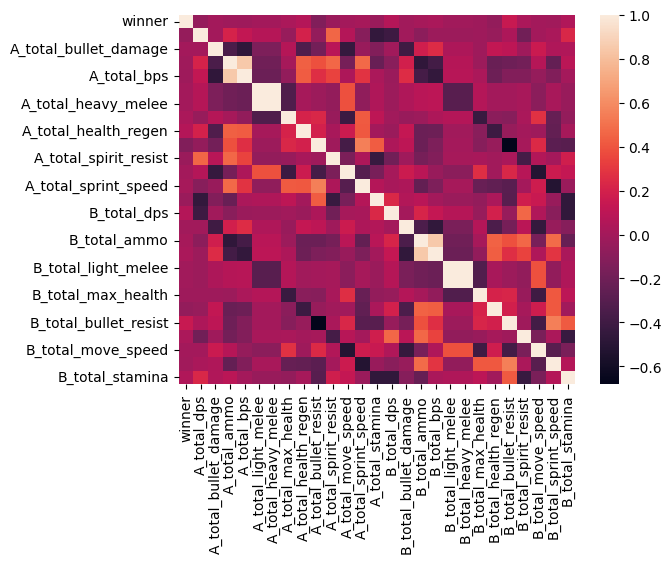

In [218]:
import seaborn as sns
to_corr = df[['winner'] + list(df.loc[:, 'A_total_dps':'B_total_stamina'].columns)]
sns.heatmap(to_corr.corr())

<Axes: >

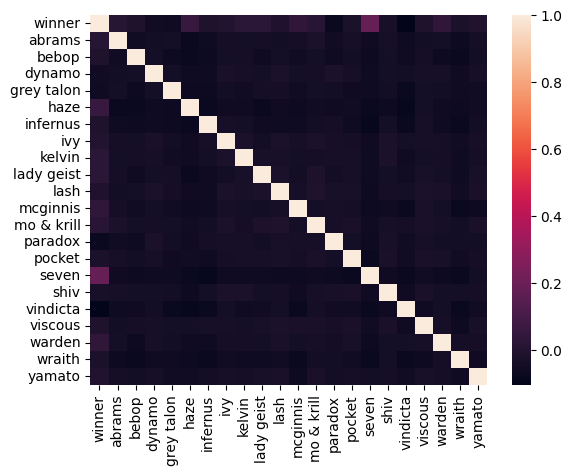

In [219]:
to_corr = df[['winner'] + list(heroes)]
sns.heatmap(to_corr.corr())

In [220]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [221]:
X, y = df.drop('winner', axis=1), df['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)
X_train.shape, X_test.shape

((13581, 49), (5821, 49))

In [222]:
RFC = RandomForestClassifier(n_estimators=250, max_depth=25)
RFC.fit(X_train, y_train)

y_pred_train = RFC.predict(X_train)
y_pred_test = RFC.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'accuracy train: {accuracy_train}, accuracy test: {accuracy_test}')

accuracy train: 0.9999263677196083, accuracy test: 0.5852946229170246


In [223]:
GBC = GradientBoostingClassifier(n_estimators=1500, max_depth=3)
GBC.fit(X_train, y_train)

y_pred_train = GBC.predict(X_train)
y_pred_test = GBC.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'accuracy train: {accuracy_train}, accuracy test: {accuracy_test}')

accuracy train: 0.847286650467565, accuracy test: 0.5634770657962549


In [224]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'accuracy train: {accuracy_train}, accuracy test: {accuracy_test}')

accuracy train: 0.6141668507473677, accuracy test: 0.6016148428105137


In [235]:
A_team = ['hero_1_A', 'hero_2_A', 'hero_3_A', 'hero_4_A', 'hero_5_A', 'hero_6_A']
B_team = ['hero_1_B', 'hero_2_B', 'hero_3_B', 'hero_4_B', 'hero_5_B', 'hero_6_B']
heroes_stats_df = pd.read_csv('data/heroes_stats.csv')
heroes = heroes_stats_df['localized_name']

heroes_A = [input('enter amber heroes: ').lower().strip() for _ in range(6)]
heroes_B = [input('enter sapphire heroes: ').lower().strip() for _ in range(6)]

test_match = pd.read_csv('data/blank_sample.csv')
test_match.drop('matchid', axis=1, inplace=True)
test_match.drop('winner', axis=1, inplace=True)

for i in range(1, 7):
    test_match[f'hero_{i}_A'] = heroes_A[i - 1]
for i in range(1, 7):
    test_match[f'hero_{i}_B'] = heroes_B[i - 1]

test_match['A'] = test_match[A_team].values.tolist()
test_match['B'] = test_match[B_team].values.tolist()
for ch in ('A', 'B'):
    for i in range(1, 7):
        test_match.drop(f'hero_{i}_{ch}', axis=1, inplace=True)

test_match['A_synergy'] = test_match['A'].apply(synergy)
test_match['B_synergy'] = test_match['B'].apply(synergy)

test_match[A_team] = test_match['A'].tolist()
test_match[B_team] = test_match['B'].tolist()
test_match.drop(['A', 'B'], axis=1, inplace=True)

for hero in heroes:
    test_match[hero] = 0
    test_match[f'{hero}'] -= (test_match[A_team] == f'{hero}').any(axis=1)
    test_match[f'{hero}'] += (test_match[B_team] == f'{hero}').any(axis=1)

for ch in ('A', 'B'):
    for i in range(1, 7):
        test_match.drop(f'hero_{i}_{ch}', axis=1, inplace=True)

for ch in ('A', 'B'):
    for col in heroes_stats_df.columns[1:]:
        test_match[f'{ch}_total_{col}'] = 0

add_heroes_attributes(test_match)

,A_synergy,B_synergy,abrams,bebop,dynamo,grey talon,haze,infernus,ivy,kelvin,lady geist,lash,mcginnis,mo & krill,paradox,pocket,seven,shiv,vindicta,viscous,warden,wraith,yamato,A_total_dps,A_total_bullet_damage,A_total_ammo,A_total_bps,A_total_light_melee,A_total_heavy_melee,A_total_max_health,A_total_health_regen,A_total_bullet_resist,A_total_spirit_resist,A_total_move_speed,A_total_sprint_speed,A_total_stamina,B_total_dps,B_total_bullet_damage,B_total_ammo,B_total_bps,B_total_light_melee,B_total_heavy_melee,B_total_max_health,B_total_health_regen,B_total_bullet_resist,B_total_spirit_resist,B_total_move_speed,B_total_sprint_speed,B_total_stamina
0,7.59249,7.731087,1,0,0,1,-1,1,0,0,-1,1,-1,0,0,0,1,-1,0,-1,0,1,-1,400.0,63.1,146.0,34.12,384.0,708.0,3350.0,11.0,0.0,25.0,42.5,1.0,17.0,376.0,60.28,163.0,37.51,378.0,696.0,3425.0,10.5,8.0,15.0,40.0,1.0,18.0


In [241]:
test_match_scaled = scaler.transform(test_match)
res = logreg.predict(test_match_scaled)
if res == 1:
    print(f'the sapphire flame: {logreg.predict_proba(test_match_scaled)[0][1]* 100:.1f}%')
else:
    print(f'the amber hand: {logreg.predict_proba(test_match_scaled)[0][0]* 100:.1f}%')

the sapphire flame: 57.4%
